In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from numpy import *
from scipy import signal

In [127]:
data=TimeSeries.get('L1:GDS-CALIB_STRAIN',1129711814,1129711814+300)

In [167]:
nyq=data.sample_rate.value/2.
bp=signal.butter(8,[30./nyq,240./nyq],btype='bandpass',output='sos')
hp=signal.butter(8,20./nyq,btype='highpass',output='sos')
lp=signal.butter(8,260./nyq,btype='lowpass',output='sos')
notchcal=signal.butter(4,[34./nyq,36./nyq],btype='bandstop',output='sos')
notchcal2=signal.zpk2sos([exp(1.j*pi*331.3/nyq),exp(-1.j*pi*331.3/nyq)],
               [0.9995*exp(1.j*pi*331.3/nyq),0.9995*exp(-1.j*pi*331.3/nyq)],
               1.)
notch60=signal.zpk2sos([exp(1.j*pi*60./nyq),exp(-1.j*pi*60./nyq)],
               [0.9995*exp(1.j*pi*60./nyq),0.9995*exp(-1.j*pi*60./nyq)],
               1.)
notch180=signal.zpk2sos([exp(1.j*pi*180./nyq),exp(-1.j*pi*180./nyq)],
               [0.9995*exp(1.j*pi*180./nyq),0.9995*exp(-1.j*pi*180./nyq)],
               1.)
notchviolin=signal.butter(8,[480./nyq,540./nyq],btype='bandstop',output='sos')
bs=signal.butter(4,[290./nyq,330./nyq],btype='bandstop',output='sos')

In [168]:
pole=signal.zpk2sos([1.],[],20.)
allfilt=concatenate([lp,hp,notch60,notch180,notchcal,notchcal2,bp,bs,pole,notchviolin])

In [169]:
fdata=data.filter(allfilt)

(1e-30, 1e-16)

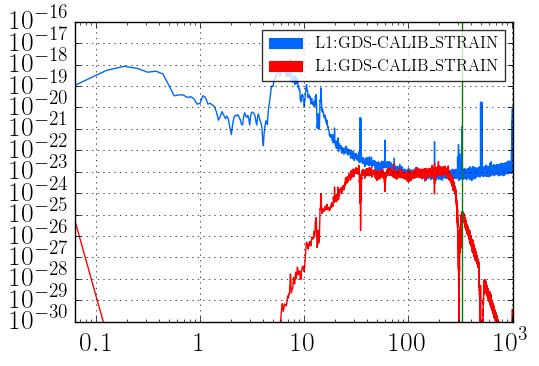

In [176]:
myplt=data[10*16384:(10+64)*16384].asd(16,12).plot()
myplt.gca().plot(fdata[10*16384:(10+64)*16384].asd(16,12))
myplt.set_xlim(0,1024)
myplt.gca().axvline(331.3,c='g')
myplt.set_ylim(1.e-30,1.e-16)

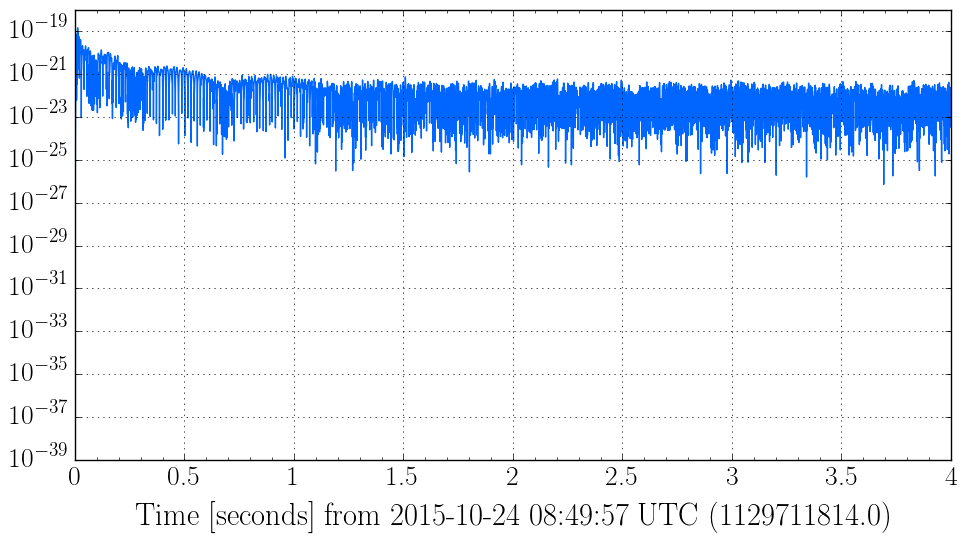

In [172]:
tsplt=abs(fdata[:int(4*16384)]).plot()
tsplt.gca().set_yscale('log')

In [173]:
from scipy.io import wavfile

In [174]:
output=fdata.value[10*16384:]/max(abs(fdata.value[10*16384:]))

In [175]:
wavfile.write('test2.wav',rate=2*nyq*2,data=output)